## Boston Housing dataset EDA

Athul Mathew CB.EN.P2AID   17-02-2021   LAB EXPERIMENT2 

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/BostonHousing.csv')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [4]:
df = df.rename(columns={"CAT. MEDV": "CAT_MEDV"})
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9,0


In [5]:
print('CRIM Mean : ', df.CRIM.mean())
print('CRIM Std. dev : ', df.CRIM.std())
print('CRIM Min : ', df.CRIM.min())
print('CRIM Max : ', df.CRIM.max())
print('CRIM Median : ', df.CRIM.median())
print('CRIM Length : ', len(df.CRIM))
print('Number of missing values(CRIM) : ', df.CRIM.isnull().sum())

CRIM Mean :  3.6135235573122535
CRIM Std. dev :  8.601545105332487
CRIM Min :  0.00632
CRIM Max :  88.9762
CRIM Median :  0.25651
CRIM Length :  506
Number of missing values(CRIM) :  0


In [7]:
pd.DataFrame({'mean': df.mean(),
'sd': df.std(),
'min': df.min(),
'max': df.max(),
'median': df.median(),
'length': len(df),
'miss.val': df.isnull().sum(),
})

,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


In [8]:
#Correlation
df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


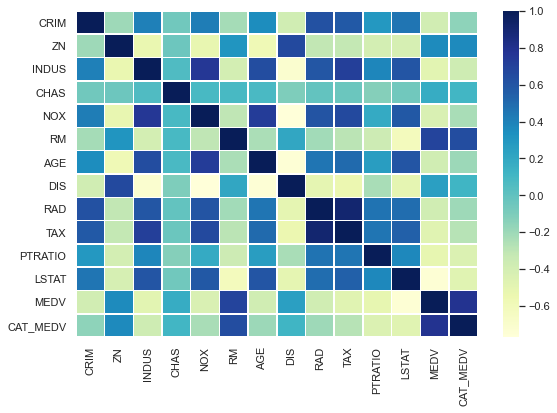

In [12]:
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), linewidths=.5, ax=ax, cmap='YlGnBu')
plt.show()

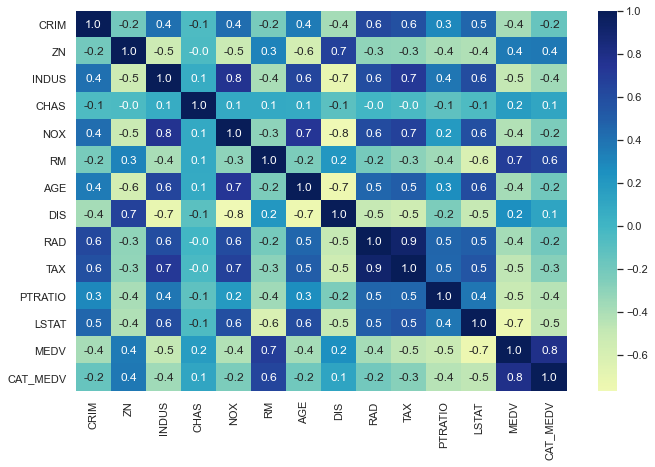

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap = 'YlGnBu', center=0, ax=ax)

In [16]:
df.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [17]:
df["RM_bin"] = pd.cut(df.RM, range(0, 10))

In [18]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,"(6, 7]"
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,"(6, 7]"


In [19]:
df["RM_bin"] = pd.cut(df.RM, range(0, 10), labels=False)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,6


In [20]:
df.groupby(["RM_bin", "CHAS"])["MEDV"].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

In [22]:
df["RM_bin"]= pd.cut(df.RM, range(0, 10),labels=False)
df["RM_bin"]

0      6
1      6
2      7
3      6
4      7
      ..
501    6
502    6
503    6
504    6
505    6
Name: RM_bin, Length: 506, dtype: int64

In [23]:
df.groupby(["RM_bin", "CHAS"])["MEDV"].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

In [24]:
pd.pivot_table(df, values="MEDV", index=["RM_bin"], 
               columns= ["CHAS"],aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806
